# 앙상블 : boosting
- 모델 결합으로 예측
    - 얕은 결정트리로 이전 트리 오차를 보정
    - 순차적 경사하강법으로 이전 트리 오차 줄임
        - 분류모델은 손실함수 logloss 사용해 오차줄임
        - 회귀모델은 손실함수 MSE 사용해 오차줄임
    - boosting 계열은 일반적으로 결정트리 개수 늘려도 과적합에 강함
    - 대표적 모델: gradientBoosting, HistGradientBoosting, XGBoost, LightGBM, catBoost 

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0


### GradientBoosting

In [19]:
from sklearn.tree import DecisionTreeRegressor

In [20]:
class SimpleGradientBoostingClassifier:
    def __init__(self, n_estimators=100, learning_rate=0.2, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.initial_log_odds = 0   # 초기 예측값
        self.trees = []             # estimator 담을 배열

    def log_odds(self, p):
        return np.log(p / (1 - p))
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        y_mean = np.mean(y)
        self.initial_log_odds = self.log_odds(y_mean)
        y_pred_log_odds = np.full_like(y, self.initial_log_odds, dtype=np.float64)
        
        for _ in range(self.n_estimators):
            
            # 현재 상태에서 예측된 확률값 계산
            y_pred_proba = self.sigmoid(y_pred_log_odds)
            
            # 잔차 계산
            residual = y - y_pred_proba

            # 결정트리 생성 및 학습
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, residual)
            self.trees.append(tree)
            y_pred_log_odds += self.learning_rate * tree.predict(X)

    def predict(self, X):
        return (self.predict_proba(X) >= 0.5).astype(int)

    def predict_proba(self, X):
        y_pred_log_odds = np.full(X.shape[0], self.initial_log_odds,dtype=np.float64)

        for  tree in self.trees:
            y_pred_log_odds += self.learning_rate * tree.predict(X)

        return self.sigmoid(y_pred_log_odds)

In [21]:
# SimpleGradientBoostingClassifier로 유방암 데이터 예측
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 데이터 로드 및 분리
data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=0)

# 모델 생성
simple_gb_clf = SimpleGradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3
)

simple_gb_clf.fit(X_train, y_train)

y_pred_train = simple_gb_clf.predict(X_train)
y_pred_test = simple_gb_clf.predict(X_test)

print(f'학습 정확도: {accuracy_score(y_train, y_pred_train)}')
print(f'테스트 정확도: {accuracy_score(y_test, y_pred_test)}')

학습 정확도: 0.9929577464788732
테스트 정확도: 0.958041958041958


---
### 와인데이터셋 이진 분류 (과제) (wine_simple.csv 쓰기)

In [ ]:
# 1. 데로
# 2. 데분
# 3. randomFrestClassifier 모델 생성 및 학습
# 4. 예측
# 5. 정확도 출력
# 6. 특성 중요도 시각화



### 인간행동인식 다중 분류 (과제)

https://www.kaggle.com/datasets/uciml/human-activity-recognition-with-smartphones 

사용자 행동 target class
- WALKING
- WALKING_UPSTAIRS
- WALKING_DOWNSTAIRS
- SITTING
- STANDING
- LAYING

**HAR 특성 설명**

| **특성 유형**             | **설명**                                                                                                                                     |
|--------------------------|--------------------------------------------------------------------------------------------------------------------------------------------|
| **Mean와 Std**            | 'tBodyAcc-mean()-X', 'tBodyAcc-std()-Y'와 같은 특성은 시간 도메인에서의 신체 가속도에 대한 평균 및 표준편차 값 ('X', 'Y', 'Z'는 축을 의미) |
| **주파수 도메인 특징**     | 이름에 'f'로 시작하는 특성은 주파수 도메인에서 계산된 값 (예를 들어 'fBodyAcc-meanFreq()-X'는 신체 가속도 센서의 X축에서의 평균 주파수 값)    |
| **가속도와 자이로스코프 데이터** | 'tBodyAcc', 'tGravityAcc', 'tBodyGyro' 등의 특성은 신체 가속도, 중력 가속도, 자이로스코프 데이터                                                  |
| **Jerk 신호**             | 'tBodyAccJerk-mean()-X'와 같은 특성은 가속도의 변화율 (활동 간의 차이를 분류하는 데 중요한 역할)                                          |
| **Magnitude(크기)**       | 'tBodyAccMag-mean()', 'tGravityAccMag-std()'와 같은 특성은 특정 축 방향의 가속도 또는 자이로스코프 값을 합친 크기                                             |
| **FFT 변환 기반 특징**    | 주파수 도메인에서의 데이터 특성들은 Fourier 변환을 통해 얻어짐 (예를 들어, 'fBodyAccMag-mean()'은 주파수 도메인에서 가속도의 크기의 평균값)                  |
| **Angle(각도)**           | 'angle(X,gravityMean)'과 같은 특성은 특정 축과 중력 벡터 간의 각도 (중력과의 상대적인 위치 나타냄)                                                    |
| **레이블**                | 'Activity' 컬럼에는 각 행의 활동 레이블이 포함 (걷기, 계단 오르기, 계단 내리기, 앉기, 서기, 눕기 등의 활동 종류 있음)                                          |


In [22]:
# 1. 데로
# 2. 데분
# 3. 레이블 인코딩 (Activity 숫자로 변환)
# 4. 데이터 정규화
# 5. RandomForestClassifier 모델 학습
# 6. 모델 예측
# 7. 평가 (정확도)
# 8. 중요도 상위 20개 특성 시각화

---
### GradientBoosting

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_breast_cancer()

df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)

gb_clf = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate= 0.01,
    max_depth=3
)

gb_clf.fit(X_train, y_train)

y_pred_train = gb_clf.predict(X_train)
y_pred_test = gb_clf.predict(X_test)

print(f'학습 정확도: {accuracy_score(y_train, y_pred_train)}')
print(f'테스트 정확도: {accuracy_score(y_test, y_pred_test)}')

학습 정확도: 0.9906103286384976
테스트 정확도: 0.9790209790209791


### HistGradientBoosting
- 고성능 GradientBoosting 모델로 대규모 데이터셋 처리에 적합
- Histogram 기반으로 256개의 구간으로 나누어 처리 병합하는 방식
    - 단 1개는 무조건 모델 내부적은 동작특성상 결측치 전용임. 그래서 max는 255
- 결측치가 있어도 전처리가 필요 없음
- LightGBM의 영향을 받아 만들어진 sckit-learn의 모델

In [30]:
from sklearn.ensemble import HistGradientBoostingClassifier

hist_gb_clf = HistGradientBoostingClassifier(
    learning_rate=0.1,
    max_depth=3,
    max_bins=255,
    early_stopping=True,    # 일정횟수 이상 성능 향상이 없으면 종료
    n_iter_no_change=5      # 일정횟수 지정 (기본 10)
)

hist_gb_clf.fit(X_train, y_train)

y_pred_train = gb_clf.predict(X_train)
y_pred_test = gb_clf.predict(X_test)

print(f'학습 정확도: {accuracy_score(y_train, y_pred_train)}')
print(f'테스트 정확도: {accuracy_score(y_test, y_pred_test)}')

학습 정확도: 0.9906103286384976
테스트 정확도: 0.9790209790209791


In [ ]:
# permutation_importance 특성 중요도
from sklearn.inspection import permutation_importance

# 특성 선택 -> 값을 무작위로 섞음 -> 순서가 바뀌게 됨 -> 모델에 줌 -> 성능 하락이 얼만지 분석하여 특성 중요도 찾음

result = permutation_importance(
    hist_gb_clf,
    X_train,
    y_train,
    n_repeats=5,
    random_state=0
)

# result.importances        # 특성 중요도
# result.importances_std    # 중요도 표준편차
result.importances_mean     # 평균 중요도

array([ 0.        , -0.00140845,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.01220657,  0.        , -0.00046948,
        0.        ,  0.        ,  0.00140845,  0.00140845,  0.        ,
        0.        ,  0.        ,  0.        , -0.00093897,  0.00093897,
        0.00046948,  0.02253521,  0.00469484,  0.01314554,  0.        ,
        0.        ,  0.00469484,  0.02065728,  0.00093897,  0.        ])

### 회귀 모델

`sklearn.datasets.load_diabetes` 데이터셋
- 당뇨병 환자의 진단 자료를 바탕으로 만들어진 회귀용 데이터셋

**데이터셋 설명:**
- **목적**: 당뇨병 진행 정도(1년 후)를 예측
- **데이터 수**: 442개의 샘플
- **특성 수**: 10개의 특성 (10개의 입력 변수)
- **타겟**: 연속형 값, 당뇨병의 1년 후 진행 상황을 나타냄

**특성 설명:**
데이터셋의 각 특성(피처)은 환자의 다양한 생체 정보

1. **age**: 나이 (Age)
2. **sex**: 성별 (Sex)
3. **bmi**: 체질량 지수 (Body Mass Index)
4. **bp**: 평균 혈압 (Average Blood Pressure)
5. **s1**: 혈청 내 TC (Total Cholesterol)
6. **s2**: 혈청 내 LDL (Low-Density Lipoproteins)
7. **s3**: 혈청 내 HDL (High-Density Lipoproteins)
8. **s4**: 혈청 내 TCH (Total Cholesterol / HDL)
9. **s5**: 혈청 내 LTG (Log of Serum Triglycerides)
10. **s6**: 혈당 수치 (Blood Sugar Level)

**데이터 구조:**
- **입력 데이터 (data)**: (442, 10) 크기의 NumPy 배열
- **타겟 데이터 (target)**: (442,) 크기의 NumPy 배열로, 각 샘플의 타겟 값(연속형 값)을 포함

In [83]:
from sklearn.datasets import load_diabetes

# 1. 데로
data = load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# 2. 데분
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)

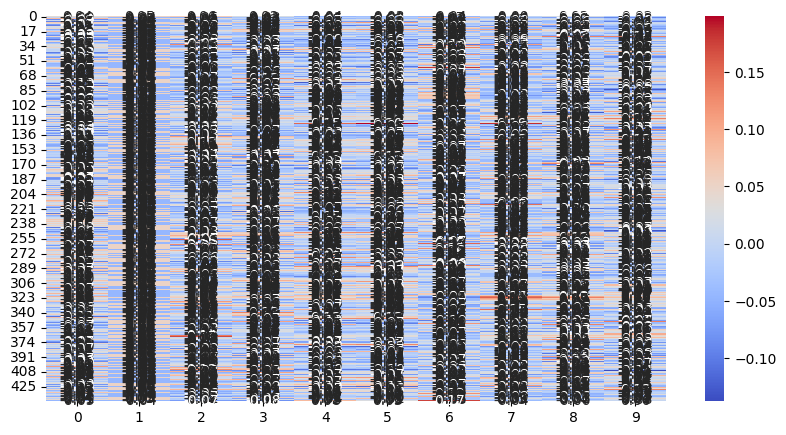

In [88]:
import seaborn as sns

plt.figure(figsize=(10,5))
sns.heatmap(data=data.data, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.show()

In [98]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
import itertools

# 탐색할 파라미터 후보들
param_grid = {
    "learning_rate": [0.01, 0.02, 0.03, 0.04, 0.05],
    "max_depth": [1, 3, 4, 5, 6, 7, 10],
    "max_bins": [16, 32, 64, 128],
    'max_iter': [100],
    'min_samples_leaf': [10]
}

best_score = -float("inf")
best_params = None

# 모든 조합 만들기
for lr, depth, bins, iter, min_lf in itertools.product(
    param_grid["learning_rate"],
    param_grid["max_depth"],
    param_grid["max_bins"],
    param_grid['max_iter'],
    param_grid['min_samples_leaf']
):
    model = HistGradientBoostingRegressor(
        # max_iter=100,
        # min_samples_leaf=5,
        learning_rate=lr,
        max_depth=depth,
        max_bins=bins,
        max_iter=iter,
        min_samples_leaf=min_lf
    )
    
    # 학습
    model.fit(X_train, y_train)
    
    # 예측
    y_pred = model.predict(X_test)
    
    # 평가
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"[lr={lr}, depth={depth}, bins={bins}]  MSE={mse:.4f}, R2={r2:.4f}")
    
    # R2 기준으로 베스트 업데이트
    if r2 > best_score:
        best_score = r2
        best_params = (lr, depth, bins)

print("\n최고 파라미터:", best_params, "with R2:", best_score)


[lr=0.01, depth=1, bins=16]  MSE=4520.0936, R2=0.2642
[lr=0.01, depth=1, bins=32]  MSE=4520.9659, R2=0.2641
[lr=0.01, depth=1, bins=64]  MSE=4557.6587, R2=0.2581
[lr=0.01, depth=1, bins=128]  MSE=4552.6137, R2=0.2589
[lr=0.01, depth=3, bins=16]  MSE=3868.6347, R2=0.3703
[lr=0.01, depth=3, bins=32]  MSE=3901.3208, R2=0.3650
[lr=0.01, depth=3, bins=64]  MSE=3927.0091, R2=0.3608
[lr=0.01, depth=3, bins=128]  MSE=3997.5385, R2=0.3493
[lr=0.01, depth=4, bins=16]  MSE=3827.2334, R2=0.3770
[lr=0.01, depth=4, bins=32]  MSE=3900.0167, R2=0.3652
[lr=0.01, depth=4, bins=64]  MSE=3873.6827, R2=0.3695
[lr=0.01, depth=4, bins=128]  MSE=3828.9521, R2=0.3767
[lr=0.01, depth=5, bins=16]  MSE=3813.2732, R2=0.3793
[lr=0.01, depth=5, bins=32]  MSE=3958.6812, R2=0.3556
[lr=0.01, depth=5, bins=64]  MSE=3846.2226, R2=0.3739
[lr=0.01, depth=5, bins=128]  MSE=3784.9034, R2=0.3839
[lr=0.01, depth=6, bins=16]  MSE=3865.6261, R2=0.3708
[lr=0.01, depth=6, bins=32]  MSE=4026.2619, R2=0.3446
[lr=0.01, depth=6, bins=

In [90]:
# 교차검증
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_iter': [100, 150, 200],
    'max_depth': [1, 3, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'min_samples_leaf': [10, 20, 30],
    'max_bins': [32, 64, 128]
}
hist_gb_reg = HistGradientBoostingRegressor(random_state=0)

grid_search = GridSearchCV(
    hist_gb_reg,
    param_grid,
    cv=3,
    scoring='neg_mean_squared_error'
)
grid_search.fit(X_train, y_train)

grid_search.best_params_, grid_search.best_score_

({'learning_rate': 0.1,
  'max_bins': 32,
  'max_depth': 1,
  'max_iter': 100,
  'min_samples_leaf': 10},
 np.float64(-3080.2808627663658))

In [ ]:
best_hist_gb_reg = grid_search.best_estimator_
best_hist_gb_reg

    # 학습
best_hist_gb_reg.fit(X_train, y_train)
    
# 학습 예측
y_pred = best_hist_gb_reg.predict(X_test)

# 테스트 예측
y_pred = best_hist_gb_reg.predict(X_test)

    # 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
    
print(f'MSE 학습: {mean_squared_error(y_train, y_pred)}')
print(f'R2 학습: {r2_score(y_train, y_pred)}')
print(f'MSE 테스트: {mean_squared_error(y_test, y_pred)}')
print(f'R2 테스트: {r2_score(y_test, y_pred)}')

MSE=3426.0700, R2=0.4423
